<a href="https://colab.research.google.com/github/serzhoon/NoSQL_NCFU/blob/main/lab07_NoSQL_Redis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Отчёт по лабораторной работе на тему: Redis

### Выполнил студент группы ПИН-Б-З-22-1

### Гадиян Сергей Гариевич

###Задачи

1. Установите драйвер вашего любимого языка программирования и подключитесь к серверу Redis.
Вставьте и увеличьте значение в рамках транзакции.


In [ ]:
#Установка драйвера языка python
sergey@sergey-VMware-Virtual-Platform:~/redis_lab$ sudo apt install python3-redis


In [ ]:
import redis
r = redis.Redis(host='localhost', port=6379) # подключение к Redis
print("Подключились к Redis")
r.set("count", 0) # начальное значение
# транзакция: увеличиваем значение
pipe = r.pipeline()
pipe.multi()  # начало транзакции
pipe.incr("count") # +1
pipe.incrby("count", 5) # +5
result = pipe.execute() # выполнение

print(f"Результат: {result}")
print(f"Финальное значение: {r.get('count')}")

In [ ]:
# запуск
sergey@sergey-VMware-Virtual-Platform:~/redis_lab$ python3 redis_test.py
Подключились к Redis
Результат: [1, 6]
Финальное значение: b'6'


2. Используя выбранный вами драйвер, создайте программу, которая считывает блокирующий
список и выводит данные куда-нибудь (консоль, файл, Socket.io и т.д.), а также другую программу,
которая записывает в тот же список

Я создал два файла python, один с именем writer.py, отправляющий сообщения в очередь redis, и reader.py, который читает эти сообщения

In [ ]:
# reader.py
import redis  # импорт библиотеки Redis для работы с Redis сервером
r = redis.Redis(host='localhost', port=6379, decode_responses=True) # подключаемся к Redis
print("Жду сообщения...")
# бесконечный цикл для чтения, будет работать пока не прервем вручную Ctrl+C в терминале
while True:
    result = r.brpop("my_list", timeout=10) # brpop удаляет и возвращает последний элемент списка,блокирует программу если список пуст
    if result:
        print(f"Получил: {result[1]}") # выводим само сообщение
    else: # ели прошло 10 секунд и список остался пустым
        print("Таймаут, сообщений нет")

In [ ]:
# writer.py
import redis
import time # модуль time для работы с задержками
r = redis.Redis(host='localhost', port=6379, decode_responses=True) # подключение
# пишем сообщения в список
messages = ["Привет", "Как дела?", "Сообщение 3", "Сообщение 4", "Конец"]  # список сообщений для отправки
for msg in messages:
    r.lpush("my_list", msg)  # добавляем сообщение в начало списка my_list в Redis
    # lpush = left push добавляет элемент в начало списка
    print(f"Отправил: {msg}")
    time.sleep(1)

reader.py ожидает получения сообщения

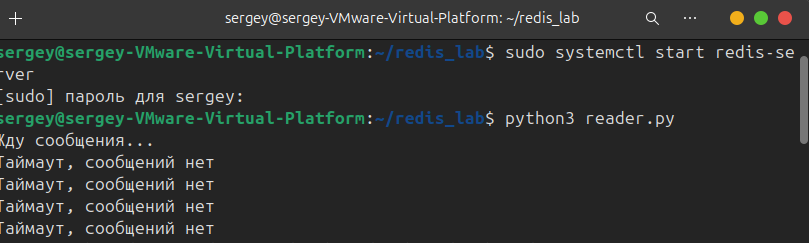

Состояние reader.py после запуска writer.py

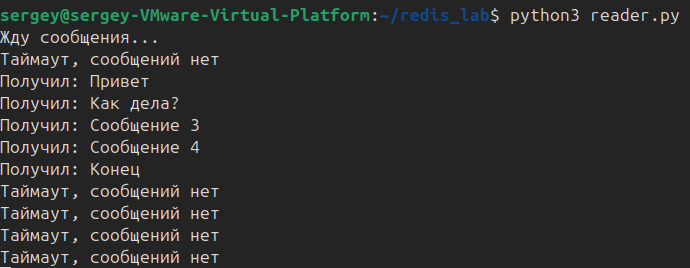

Что происходит во writer.py, после запуска:

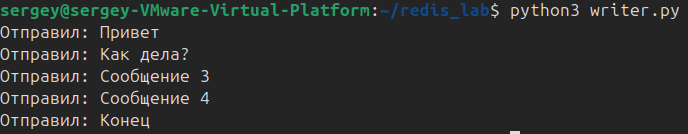